# 1. 라이브러리 가져오기
### 방법: import A as B
#### pandas는 pd, matplotlib은 plt, seaborn은 sns로 약칭 가능

In [78]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 2. 타이타닉 데이터 살펴보기

### pandas 라이브러리 import

In [79]:
import pandas as pd

### 타이타닉 데이터를 담아올 변수 선언

In [25]:
titanic = pd.read_csv('titanic.csv')

### 타이타닉 데이터를 살펴봅시다!

Survived: 생존여부 - 0은 사망, 1은 생존

Pclass: 탑승석 - 1등석, 2등석, 3등석

SibSp: 동승한 자매/배우자 수

Parch: 동승한 부모/자식 수

Fare: Ticket 가격

Cabin: 방 호수

Embarked: 승선지 - C=셰르부르, Q=퀸즈타운, S=사우샘프턴

NaN: Not a Number. 결측값을 의미

In [35]:
titanic
# 총 891개의 로우와 12개의 칼럼이 있습니다.
# 칼럼과 로우는 모두 0부터 시작하므로, 마지막 정보의 로우은 890인 것을 확인할 수 있습니다.
# 즉, 타이타닉 데이터에는 타이타닉에 탑승한 891명의 정보가 들어있습니다.

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,30.0,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [27]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### 데이터셋을 요약해서 살펴봅시다

In [28]:
titanic.info()
# 데이터 프레임 자료형 확인 가능, 891개의 데이터 개수 확인 가능

# 결측값을 null, 널값이라고 부릅니다.
# Non-Nul Count에서는 해당 칼럼의 결측값이 아닌 값을 카운트해주는데, 
# Cabin 칼럼에서 204 non-null은 204개의 값만이 채워져 있고, 나머지는 결측 값이라는 뜻입니다.

# 그리고, Dtype을 확인해보면 각 칼럼에 담긴 데이터의 자료형을 보여줍니다. 
# int64는 정수형, object는 문자형, float는 실수형...

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Gender       891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# 3. 데이터 정제
## 1) 데이터 타입 변환

In [29]:
# 다음은 이 칼럼에 담긴 데이터들의 자료형을 변환해줍시다.

# Survived나 Pclass가 int로 되어있는데, 정수형 자료형은 주로 숫자 연산에 이용되어야 합니다. 
# 즉, 이 숫자들을 덧셈,뺄셈,나눗셈,곱셈했을 때 의미가 있어야 합니다.
# 그러나 Survived는 0은 사망, 1은 생존이라는 구분을 위한 것이고,
# PClass 역시 1,2,3 등석을 구분하는 것일 뿐, 연산을 해줘봤자 의미가 없으므로, 이들은 정수형이 아닌,
# 문자로 취급해주기 위해 object로 바꿔주는게 타당할 것으로 보입니다.

titanic["Survived"] = titanic["Survived"].astype(object)
titanic["Pclass"] = titanic["Pclass"].astype(object)

In [30]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    object 
 2   Pclass       891 non-null    object 
 3   Name         891 non-null    object 
 4   Gender       891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(3), object(7)
memory usage: 83.7+ KB


## 2) 결측치 처리

In [31]:
# 각각의 값이 결측치인지 아닌지를 확인 가능
print(titanic.isnull())

     PassengerId  Survived  Pclass   Name  Gender    Age  SibSp  Parch  \
0          False     False   False  False   False  False  False  False   
1          False     False   False  False   False  False  False  False   
2          False     False   False  False   False  False  False  False   
3          False     False   False  False   False  False  False  False   
4          False     False   False  False   False  False  False  False   
..           ...       ...     ...    ...     ...    ...    ...    ...   
886        False     False   False  False   False  False  False  False   
887        False     False   False  False   False  False  False  False   
888        False     False   False  False   False  False  False  False   
889        False     False   False  False   False  False  False  False   
890        False     False   False  False   False  False  False  False   

     Ticket   Fare  Cabin  Embarked  
0     False  False   True     False  
1     False  False  False     False

In [32]:
# 각 칼럼마다 결측치 수 총합을 알 수 있음
print(titanic.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Gender           0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [33]:
# Cabin이라는 칼럼은 전체 900개 가까이 되는 데이터 수에 비해 존재하는 값이 턱없이 모자라기 때문에,
# 이를 이용해 데이터를 분석해도 객관적이지 못한 결과가 나올 가능성이 큼
# 결측값이 많은 Cabin 열 제거

# axis는 축을 의미, axis 변수를 이용해 Cabin의 일정한 행 하나를 지울건지, Cabin 열 전체를 지울건지 결정

df_titanic = titanic.drop(["Cabin"], axis='columns')
df_titanic

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,30.0,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [36]:
# 이번에는 결측값이 또 존재하는 Embarked에서 결측값이 있는 특정 행을 지우기

df_titanic = df_titanic.dropna(axis=0)
print(df_titanic.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Gender         0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


# 4. 시각화를 활용한 EDA
## 0) 인덱싱
### 데이터프레임에서 원하는 값에 접근하기 위해서는 [ ] 대괄호를 이용해야 함!

In [56]:
# ex) 타이타닉 데이터에서 탑승객의 연령이 담긴 열에 접근하고 싶을 때,
titanic['Age']

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    30.0
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

### matplotlib 라이브러리 import

In [77]:
import matplotlib.pyplot as plt

## 파이차트

<AxesSubplot:ylabel='Gender'>

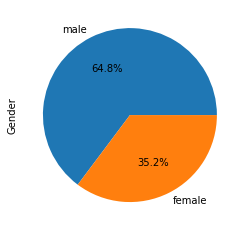

In [73]:
# value_counts(): 각 열에 들어있는 값의 개수를 카운트!
titanic.Gender.value_counts().plot(kind='pie', autopct='%.1f%%')

## 바 그래프

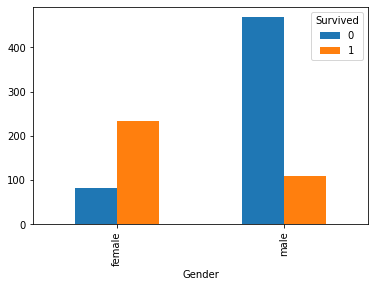

In [51]:
# 그래프에 나타내고 싶은 Gender, Survived를 묶고, 
# 막대기의 '크기'로 나타내고 싶은 Survived를 기준으로 열(row) 개수 count!
# unstack을 뒤에 붙여줘야 우리가 원하는 결과를 얻을 수 있음
df_gender = titanic.groupby(["Gender", "Survived"])["Survived"].count().unstack("Survived")
df_gender.plot(kind='bar')
plt.show()

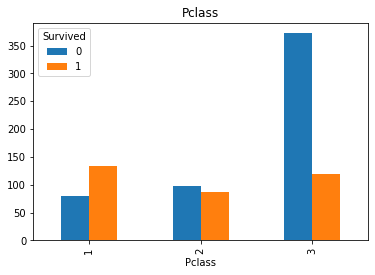

In [53]:
# (추가) Pclass에 따른 생존여부
df_pclass = df_titanic.groupby(["Pclass", "Survived"])["Survived"].count().unstack("Survived")
df_pclass.plot(kind='bar')
plt.title("Pclass")
plt.show()

# 5. 통계 지표를 활용한 EDA

In [54]:
age_count = titanic['Age'].count()
age_mean = titanic['Age'].mean()     # 평균
age_median = titanic['Age'].median() # 중앙값
age_mode = titanic['Age'].mode()     # 최빈값

print(age_count)
print(age_mean)
print(age_median)
print(age_mode)

891
29.758888888888887
30.0
0    30.0
dtype: float64


In [58]:
age_max = titanic['Age'].max()   # 최댓값
age_min = titanic['Age'].min()   # 최솟값
age_range = age_max - age_min   # 범위
age_std = titanic['Age'].std() # 표준편자

print(age_max)
print(age_min)
print(age_range)
print(age_std)

80.0
0.42
79.58
13.002570039820952


### 데이터셋의 통계지표 한번에 확인하기!

In [59]:
titanic.describe() # 문자열(Object)가 아닌 숫자형(Int, Float)에 해당하는 칼럼만 보임

,PassengerId,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,29.758889,0.523008,0.381594,32.204208
std,257.353842,13.002570,1.102743,0.806057,49.693429
min,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,30.000000,0.000000,0.000000,14.454200
75%,668.500000,35.000000,1.000000,0.000000,31.000000
max,891.000000,80.000000,8.000000,6.000000,512.329200


## 박스플롯 

<AxesSubplot:title={'center':'Age'}, xlabel='Gender'>

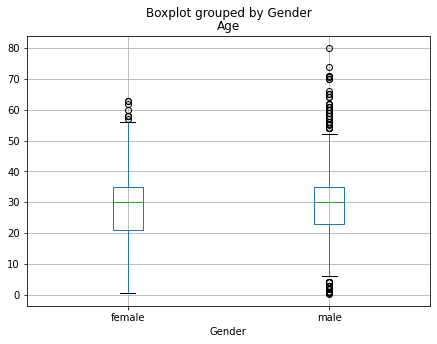

In [75]:
# 성별에 따른 연령 분포

# figsize는 차트의 크기! (차트를 어느정도의 크기로 표시할지 설정할 수 있음)
titanic.boxplot(column="Age", by="Gender", figsize=(7,5))

# 여성 나이 데이터의 중심은 20대 초~30대 중
# 남성 나이 데이터의 중심은 20대 중~30대 중
# 대부분의 남성이 5세~50대 초 사이에 있어 그 이상,이하는 이상치로 분류

### seaborn 라이브러리 import

In [80]:
import seaborn as sns

## 스캐터 플롯 (산점도)

<AxesSubplot:xlabel='Age', ylabel='Fare'>

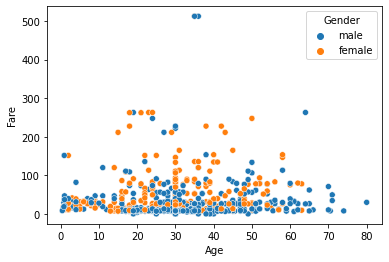

In [69]:
# 연령에 따른 티켓 가격의 분포도
sns.scatterplot(x='Age', y='Fare', hue='Gender', data=titanic)

## 변수 간의 상관관계 시각화

In [24]:
titanic.corr()

,PassengerId,Age,SibSp,Parch,Fare
PassengerId,1.000000,0.033019,-0.057527,-0.001652,0.012658
Age,0.033019,1.000000,-0.232440,-0.180330,0.090632
SibSp,-0.057527,-0.232440,1.000000,0.414838,0.159651
Parch,-0.001652,-0.180330,0.414838,1.000000,0.216225
Fare,0.012658,0.090632,0.159651,0.216225,1.000000


<AxesSubplot:>

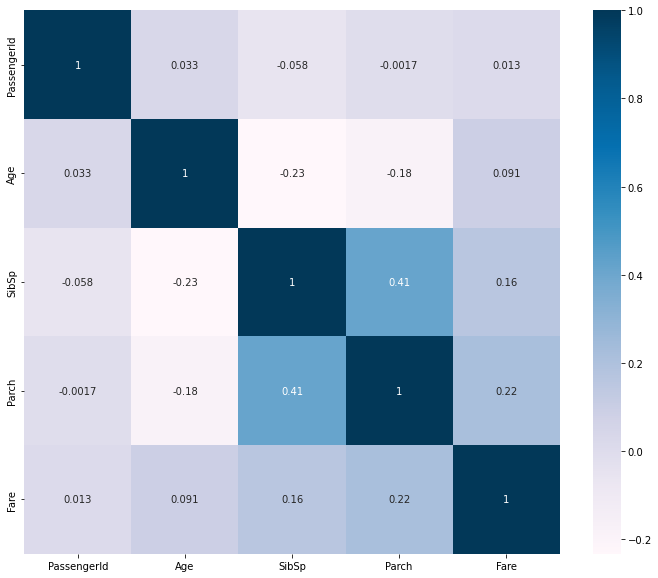

In [72]:
# annot= annotation: 상관계수를 표기
# cmap은 색상 테마

plt.figure(figsize=(12,10))
sns.heatmap(titanic.corr(), cmap="PuBu", annot= True)